## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import cv2

## Load image

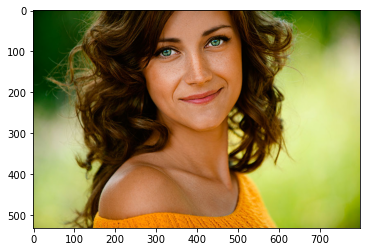

In [2]:
# Cargar imagen.
img = cv2.imread('Datasets/ExampleImage.jpg')

# BGR a RGB.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar imagen.
plt.figure()
plt.imshow(img)
plt.show()

## K means method

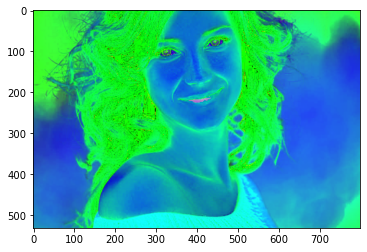

In [3]:
# Obtener forma de la imagen.
nrows, ncols, nch = img.shape

# RBG a HSV.
hsv = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2HSV)

# Redimensionar imagen HSV a una lista plana de píxeles.
X_KMeans = np.reshape(hsv.copy(), (nrows*ncols,3))

# Mostrar imagen HSV.
plt.figure()
plt.imshow(hsv)
plt.show()

### Model creation and training

In [4]:
# Creación del modelo.
KMeans_model = KMeans(n_clusters=10)

# Entranamiento y predicción.
g = KMeans_model.fit_predict(X_KMeans)

### Get groups

In [5]:
groups = np.unique(g)

### Planar grouping of pixels

In [6]:
# Iteración por cada grupo.
for i in groups:
    # Píxeles que pertenezcan al grupo i.
    pixelsPerGroup = g == i
    
    # Creación del centroide de color de todos los píxeles que pertenezcan al grupo i.
    centroid = [ np.floor(np.mean(X_KMeans[pixelsPerGroup,0])), np.floor(np.mean(X_KMeans[pixelsPerGroup,1])), np.floor(np.mean(X_KMeans[pixelsPerGroup,2])) ]
    
    # Cada píxel del grupo i obtendrá el valor del centroide de color.
    X_KMeans[pixelsPerGroup] = centroid

### Image resizing and format change

In [7]:
# Se vuelve a redimensionar a la matriz de píxeles.
img_New_KMeans = np.reshape(X_KMeans, (nrows,ncols,3))

# HSV a RGB.
img_New_KMeans = cv2.cvtColor(img_New_KMeans, cv2.COLOR_HSV2RGB)

### Show image

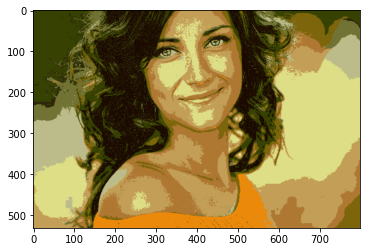

In [8]:
plt.figure()
plt.imshow(img_New_KMeans)
plt.show()

## Gaussian Mixture method

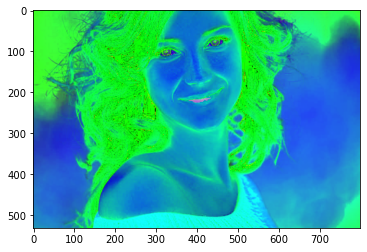

In [9]:
# Obtener forma de la imagen.
nrows, ncols, nch = img.shape

# RBG a HSV.
hsv = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2HSV)

# Redimensionar imagen HSV a una lista plana de píxeles.
X_GM = np.reshape(hsv.copy(), (nrows*ncols,3))

# Mostrar imagen HSV.
plt.figure()
plt.imshow(hsv)
plt.show()

### Model creation and training

In [10]:
# Creación del modelo.
GM_model = GaussianMixture(n_components=10)

# Entranamiento y predicción.
g = GM_model.fit_predict(X_GM)

### Get groups

In [11]:
groups = np.unique(g)

### Planar grouping of pixels

In [12]:
# Iteración por cada grupo.
for i in groups:
    # Píxeles que pertenezcan al grupo i.
    pixelsPerGroup = g == i
    
    # Creación del centroide de color de todos los píxeles que pertenezcan al grupo i.
    centroid = [ np.floor(np.mean(X_GM[pixelsPerGroup,0])), np.floor(np.mean(X_GM[pixelsPerGroup,1])), np.floor(np.mean(X_GM[pixelsPerGroup,2])) ]
    
    # Cada píxel del grupo i obtendrán el valor del centroide de color.
    X_GM[pixelsPerGroup] = centroid

### Image resizing and format change

In [13]:
# Se vuelve a redimensionar a la matriz de píxeles.
img_New_GM = np.reshape(X_GM, (nrows,ncols,3))

# HSV a RGB.
img_New_GM = cv2.cvtColor(img_New_GM, cv2.COLOR_HSV2RGB)

### Show image

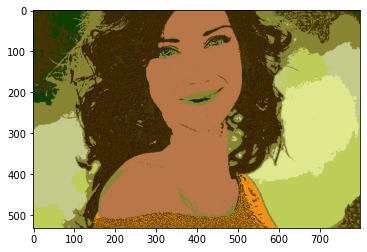

In [14]:
plt.figure()
plt.imshow(img_New_GM)
plt.show()